In [29]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [30]:
df = pd.read_csv('Results of NSAID2.csv')
df.head(5)

,SR.NO,NAME( INITIALS),GENDER,AGE(years),OCCUPATION,ACTIVE INGREDIENT OF DRUG 1,ACTIVE INGREDIENT OF DRUG 2,DOSAGE FORM,DOSE 1,DOSE2,INDICATON PATTERN,SELF MEDICATION OR NOT?,ADDITIONAL MEDICINES,INFORMATION ON NSAID,AWARENESS ON NSAID USE,PHARMACIST ROLE,SOURCE OF INFORMATION,SIDE EFFECTS,Follow-up
0,1,U K,Female,3,HOUSEWIFE,NIMESULIDE,PARACETAMOL,TABLETS,100,325.0,3,SELF MEDICATION,0,SAFE,"INDICATION,EXPIRY","DOSE, FREQUENCY",Doctor,None,Yes
1,4,N D,Female,0,STUDENT,IBUPROFEN,PARACETAMOL,SYRUP,100,162.5,0,SELF MEDICATION,0,SAFE,EXPIRY,"DOSE, FREQUENCY",Internet,None,No
2,7,S M S,Female,2,HOUSEWIFE,IBUPROFEN,PARACETAMOL,TABLETS,400,325.0,0,SELF MEDICATION,0,SAFE,NONE,"DOSE, FREQUENCY",Internet,None,Yes
3,8,A K,Female,3,HOUSEWORKER,NIMESULIDE,PARACETAMOL,TABLETS,100,325.0,3,SELF MEDICATION,0,No information,"INDICATION,EXPIRY","DOSE, FREQUENCY",None,None,No
4,9,K O,Female,2,STUDENT,MEFENAMIC ACID,NONE,TABLETS,500,0.0,3,SELF MEDICATION,0,SAFE,"INDICATION,EXPIRY","DOSE, FREQUENCY",Pharmacist,None,Yes


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SR.NO                         294 non-null    int64  
 1   NAME( INITIALS)               294 non-null    object 
 2   GENDER                        294 non-null    object 
 3   AGE(years)                    294 non-null    int64  
 4   OCCUPATION                    294 non-null    object 
 5   ACTIVE INGREDIENT OF DRUG 1   294 non-null    object 
 6   ACTIVE INGREDIENT OF DRUG 2   294 non-null    object 
 7   DOSAGE FORM                   294 non-null    object 
 8   DOSE 1                        294 non-null    int64  
 9   DOSE2                         294 non-null    float64
 10  INDICATON PATTERN             294 non-null    int64  
 11  SELF MEDICATION OR NOT?       294 non-null    object 
 12  ADDITIONAL MEDICINES          294 non-null    int64  
 13  INFOR

In [32]:
print(df.isnull().any())

SR.NO                           False
NAME( INITIALS)                 False
GENDER                          False
AGE(years)                      False
OCCUPATION                      False
ACTIVE INGREDIENT OF DRUG 1     False
ACTIVE INGREDIENT OF DRUG 2     False
DOSAGE FORM                     False
DOSE 1                          False
DOSE2                           False
INDICATON PATTERN               False
SELF MEDICATION OR NOT?         False
ADDITIONAL MEDICINES            False
INFORMATION ON NSAID            False
AWARENESS ON NSAID USE          False
PHARMACIST ROLE                 False
SOURCE OF INFORMATION           False
SIDE EFFECTS                    False
Follow-up                       False
dtype: bool


In [33]:
df.describe()

,SR.NO,AGE(years),DOSE 1,DOSE2,INDICATON PATTERN,ADDITIONAL MEDICINES
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,147.500000,2.557823,392.962585,61.352041,1.836735,1.173469
std,85.014705,0.814789,197.020820,125.618182,1.360289,1.869600
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.250000,2.000000,300.000000,0.000000,0.000000,0.000000
50%,147.500000,3.000000,500.000000,0.000000,2.000000,0.000000
75%,220.750000,3.000000,500.000000,0.000000,3.000000,2.750000
max,294.000000,4.000000,650.000000,325.000000,4.000000,7.000000


In [34]:
df.columns

Index(['SR.NO', 'NAME( INITIALS) ', 'GENDER', 'AGE(years)', 'OCCUPATION',
       'ACTIVE INGREDIENT OF DRUG 1 ', 'ACTIVE INGREDIENT OF DRUG 2',
       'DOSAGE FORM', 'DOSE 1', 'DOSE2', 'INDICATON PATTERN',
       'SELF MEDICATION OR NOT?', 'ADDITIONAL MEDICINES',
       'INFORMATION ON NSAID', 'AWARENESS ON NSAID USE', 'PHARMACIST ROLE',
       'SOURCE OF INFORMATION', 'SIDE EFFECTS', 'Follow-up'],
      dtype='object')

In [35]:
#convert textual columns to numerical---- Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['GENDER']= le.fit_transform(df['GENDER'])# MALE, FEMALE
df['NAME( INITIALS) ']= le.fit_transform(df['NAME( INITIALS) '])# UK, ND, SMS....
df['OCCUPATION']= le.fit_transform(df['OCCUPATION'])# STUDENT, HOUSEWIFE, EMPLOYED
df['ACTIVE INGREDIENT OF DRUG 1 ']= le.fit_transform(df['ACTIVE INGREDIENT OF DRUG 1 '])# IBUPROFEN, NIMEULSIDE
df['ACTIVE INGREDIENT OF DRUG 2']= le.fit_transform(df['ACTIVE INGREDIENT OF DRUG 2'])# PARACETAMOL, NONE
df['DOSAGE FORM']= le.fit_transform(df['DOSAGE FORM'])# TABLETS, SYRUP
df['SELF MEDICATION OR NOT?']= le.fit_transform(df['SELF MEDICATION OR NOT?'])# SELF MEDICATION,PRESCRIBED BY THE DOCTOR
df['INFORMATION ON NSAID']= le.fit_transform(df['INFORMATION ON NSAID'])#SAFE, SAFE,SIDE EFEECTS
df['AWARENESS ON NSAID USE']= le.fit_transform(df['AWARENESS ON NSAID USE'])#EXPIRY, INDICATION
df['PHARMACIST ROLE']= le.fit_transform(df['PHARMACIST ROLE'])#DOSE, DOSE FREQUENCY
df['SOURCE OF INFORMATION']= le.fit_transform(df['SOURCE OF INFORMATION'])#INTERNET, DOCTOR, PHARMACIST
df['SIDE EFFECTS']= le.fit_transform(df['SIDE EFFECTS'])#NONE, ULCERS
df['Follow-up']= le.fit_transform(df['Follow-up'])#yes,no


In [36]:
df.head()

,SR.NO,NAME( INITIALS),GENDER,AGE(years),OCCUPATION,ACTIVE INGREDIENT OF DRUG 1,ACTIVE INGREDIENT OF DRUG 2,DOSAGE FORM,DOSE 1,DOSE2,INDICATON PATTERN,SELF MEDICATION OR NOT?,ADDITIONAL MEDICINES,INFORMATION ON NSAID,AWARENESS ON NSAID USE,PHARMACIST ROLE,SOURCE OF INFORMATION,SIDE EFFECTS,Follow-up
0,1,157,0,3,2,13,2,6,100,325.0,3,1,0,1,2,1,0,5,1
1,4,94,0,0,5,7,2,5,100,162.5,0,1,0,1,0,1,2,5,0
2,7,143,0,2,2,7,2,6,400,325.0,0,1,0,1,4,1,2,5,1
3,8,12,0,3,3,13,2,6,100,325.0,3,1,0,0,2,1,4,5,0
4,9,71,0,2,5,11,1,6,500,0.0,3,1,0,1,2,1,5,5,1


<Axes: >

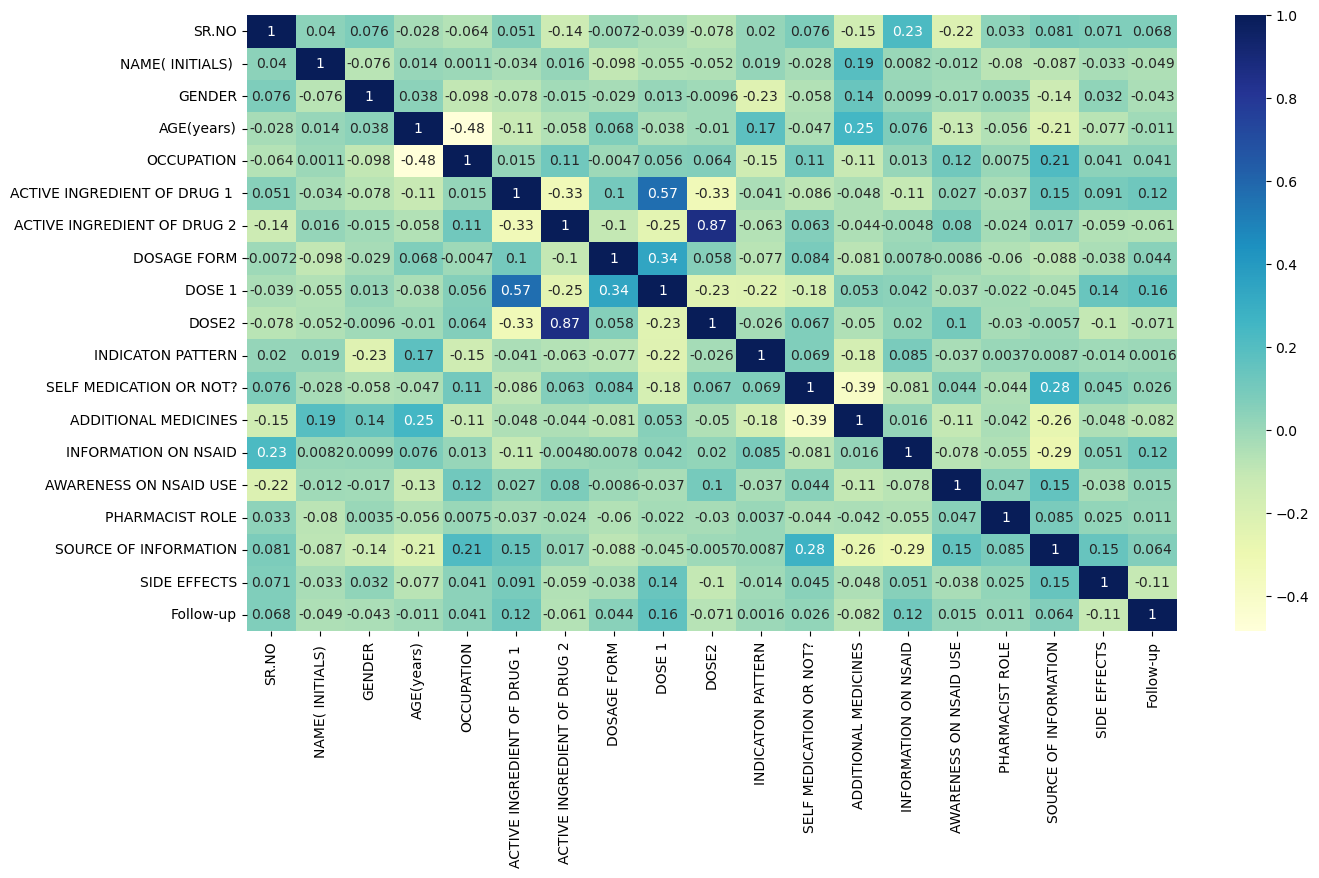

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")

In [11]:
count_duplicates = df[df.duplicated()].shape[0]
print("Number of duplicate rows:", count_duplicates)

Number of duplicate rows: 0


In [12]:
#split into dependent and independent variables
x= df.drop(columns=['SR.NO','NAME( INITIALS) ']).values

In [13]:
x

array([[0., 3., 2., ..., 0., 5., 1.],
       [0., 0., 5., ..., 2., 5., 0.],
       [0., 2., 2., ..., 2., 5., 1.],
       ...,
       [0., 3., 1., ..., 0., 5., 0.],
       [1., 3., 0., ..., 0., 5., 1.],
       [0., 2., 5., ..., 2., 5., 1.]])

In [14]:
x.shape

(294, 17)

In [15]:
y= df['SELF MEDICATION OR NOT?'].values
y

array([1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0])

In [16]:
y.shape

(294,)

In [17]:
x.shape

(294, 17)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
x_train.shape

(235, 17)

In [20]:
x_test.shape

(59, 17)

In [21]:
x

array([[0., 3., 2., ..., 0., 5., 1.],
       [0., 0., 5., ..., 2., 5., 0.],
       [0., 2., 2., ..., 2., 5., 1.],
       ...,
       [0., 3., 1., ..., 0., 5., 0.],
       [1., 3., 0., ..., 0., 5., 1.],
       [0., 2., 5., ..., 2., 5., 1.]])

In [22]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

In [23]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [24]:
logpred= log.predict(x_test)
logpred

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [25]:
y_test

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0])

In [26]:
from sklearn.metrics import accuracy_score
logacc= accuracy_score(y_test,logpred)
logacc

0.9661016949152542

In [27]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision with 'macro' averaging
precision = precision_score(y_test, logpred, average='macro')

# Calculate recall with 'macro' averaging
recall = recall_score(y_test, logpred, average='macro')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Precision: 0.65
Recall: 0.67


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
from sklearn.metrics import confusion_matrix
logcm= confusion_matrix(logpred,y_test)

In [27]:
logcm

array([[24,  0,  0],
       [ 0, 33,  2],
       [ 0,  0,  0]], dtype=int64)

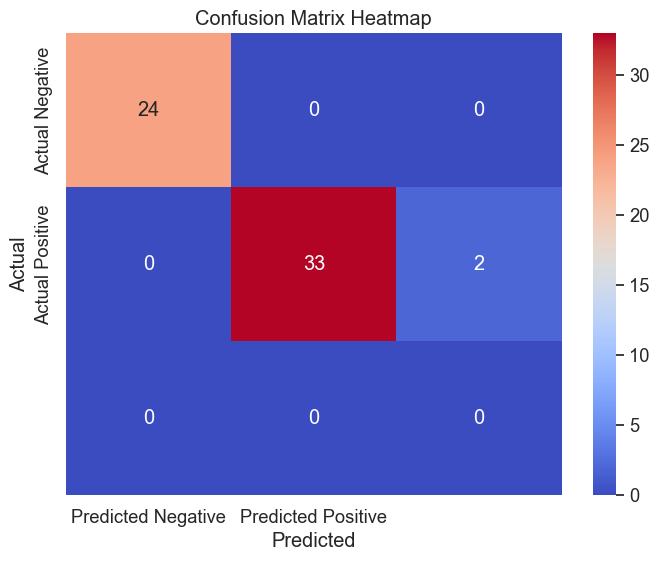

In [28]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size as needed

# Create a heatmap
sns.heatmap(logcm, annot=True, fmt="d", cmap="coolwarm",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


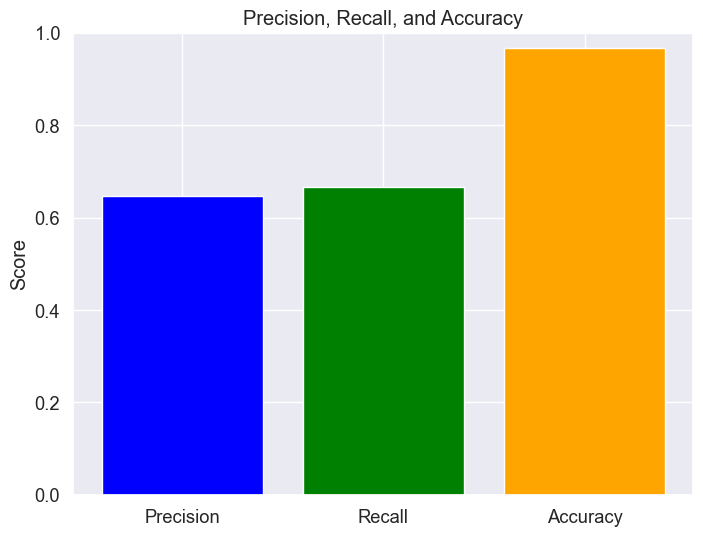

Accuracy 0.9661016949152542
Recall 0.6666666666666666
Precision 0.6476190476190476


In [72]:
import matplotlib.pyplot as plt

# Calculate precision, recall, and accuracy
precision = precision_score(y_test, logpred, average='macro')
recall = recall_score(y_test, logpred, average='macro')
accuracy = accuracy_score(y_test, logpred)

# Create a bar plot for precision, recall, and accuracy
metrics = ['Precision', 'Recall', 'Accuracy']
values = [precision, recall, accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)  # Set the y-axis limit to the range [0, 1]
plt.title('Precision, Recall, and Accuracy')
plt.ylabel('Score')
plt.show()

print("Accuracy",accuracy)
print("Recall",recall)
print("Precision",precision)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


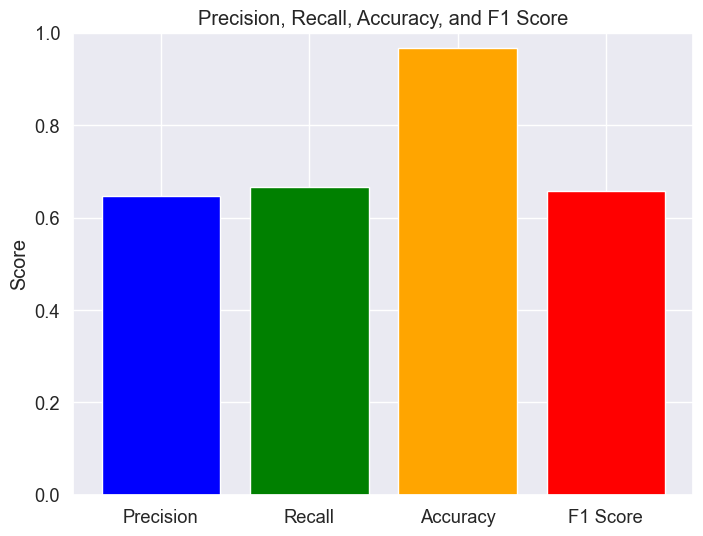

Accuracy: 0.9661016949152542
Recall: 0.6666666666666666
Precision: 0.6476190476190476
F1 Score: 0.6568627450980392


In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Calculate precision, recall, accuracy, and F1 score
precision = precision_score(y_test, logpred, average='macro')
recall = recall_score(y_test, logpred, average='macro')
accuracy = accuracy_score(y_test, logpred)
f1 = f1_score(y_test, logpred, average='macro')  # Calculate F1 score

# Create a bar plot for precision, recall, accuracy, and F1 score
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 Score']
values = [precision, recall, accuracy, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # Set the y-axis limit to the range [0, 1]
plt.title('Precision, Recall, Accuracy, and F1 Score')
plt.ylabel('Score')
plt.show()

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


In [29]:
#model building with decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [30]:
dtcpred= dtc.predict(x_test)
dtcpred

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0])

In [31]:
dtcacc= accuracy_score(dtcpred,y_test)
dtcacc
# Overfitting.

1.0

In [32]:
dtccm= confusion_matrix(dtcpred,y_test)

In [33]:
dtccm

array([[24,  0,  0],
       [ 0, 33,  0],
       [ 0,  0,  2]], dtype=int64)

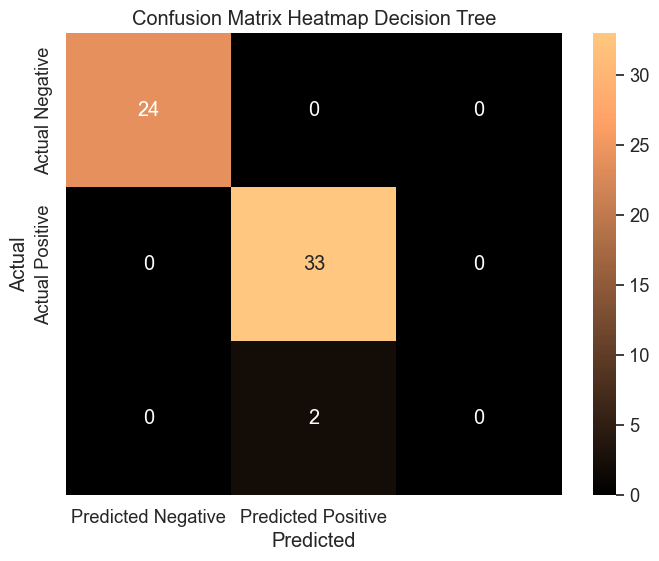

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have calculated the confusion matrix and stored it in 'cm'
# 'cm' should be a 2x2 numpy array or a DataFrame with appropriate values

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size as needed

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="copper",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap Decision Tree")
plt.show()


In [34]:
# WITHOUT DROPPING ANY VALUES.
#split into dependent and independent variables

#x= df.drop(columns=['SR.NO','NAME( INITIALS) ']).values
x = df.values

In [35]:
x

array([[  1., 157.,   0., ...,   0.,   5.,   1.],
       [  4.,  94.,   0., ...,   2.,   5.,   0.],
       [  7., 143.,   0., ...,   2.,   5.,   1.],
       ...,
       [271., 133.,   0., ...,   0.,   5.,   0.],
       [233., 121.,   1., ...,   0.,   5.,   1.],
       [264., 117.,   0., ...,   2.,   5.,   1.]])

In [36]:
x.shape

(294, 19)

In [37]:
y= df['SELF MEDICATION OR NOT?'].values
y

array([1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0])

In [38]:
y.shape

(294,)

In [39]:
x.shape

(294, 19)

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
x_train.shape

(235, 19)

In [42]:
x_test.shape

(59, 19)

In [43]:
x

array([[  1., 157.,   0., ...,   0.,   5.,   1.],
       [  4.,  94.,   0., ...,   2.,   5.,   0.],
       [  7., 143.,   0., ...,   2.,   5.,   1.],
       ...,
       [271., 133.,   0., ...,   0.,   5.,   0.],
       [233., 121.,   1., ...,   0.,   5.,   1.],
       [264., 117.,   0., ...,   2.,   5.,   1.]])

In [44]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

In [45]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [46]:
logpred= log.predict(x_test)
logpred

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [47]:
y_test

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0])

In [48]:
from sklearn.metrics import accuracy_score
logacc= accuracy_score(y_test,logpred)
logacc

0.9661016949152542

In [49]:
from sklearn.metrics import confusion_matrix
logcm= confusion_matrix(logpred,y_test)

In [50]:
logcm

array([[24,  0,  0],
       [ 0, 33,  2],
       [ 0,  0,  0]], dtype=int64)

In [51]:
#model building with decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion='entropy')
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [52]:
dtcpred= dtc.predict(x_test)
dtcpred

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0])

In [53]:
dtcacc= accuracy_score(dtcpred,y_test)
dtcacc

1.0

In [54]:
dtccm= confusion_matrix(dtcpred,y_test)

In [55]:
dtccm

array([[24,  0,  0],
       [ 0, 33,  0],
       [ 0,  0,  2]], dtype=int64)

In [79]:
# Random Forest starts here
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [80]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 2]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 2]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[24  0  0]
 [ 0 33  0]
 [ 0  2  0]]


0.9661016949152542

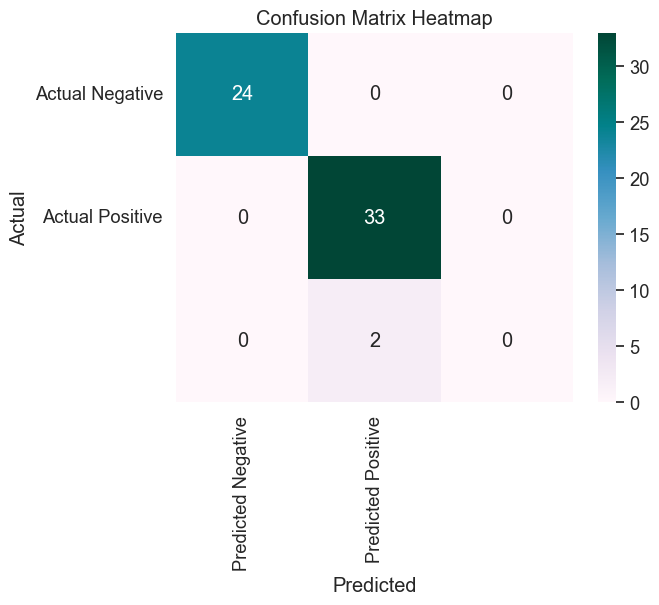

In [82]:
# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="PuBuGn",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

Confusion Matrix:
[[24  0  0]
 [ 0 33  0]
 [ 0  2  0]]
Accuracy: 0.97


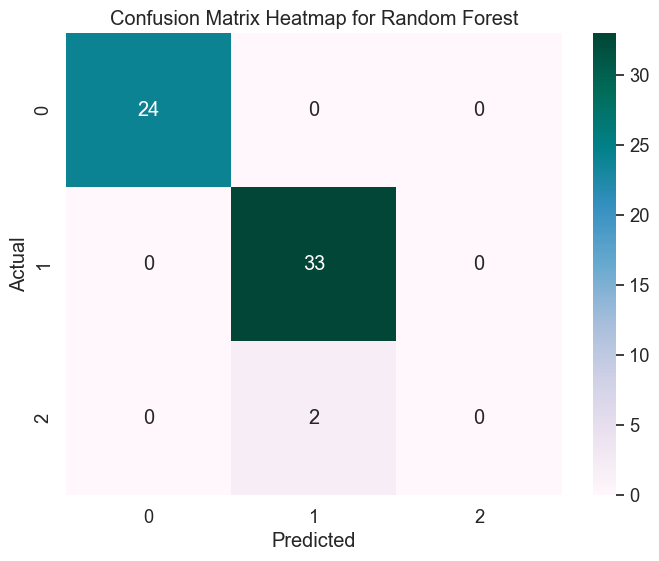

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Create and fit the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

# Make predictions
y_pred = classifier.predict(x_test)

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size as needed

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="PuBuGn")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap for Random Forest")
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


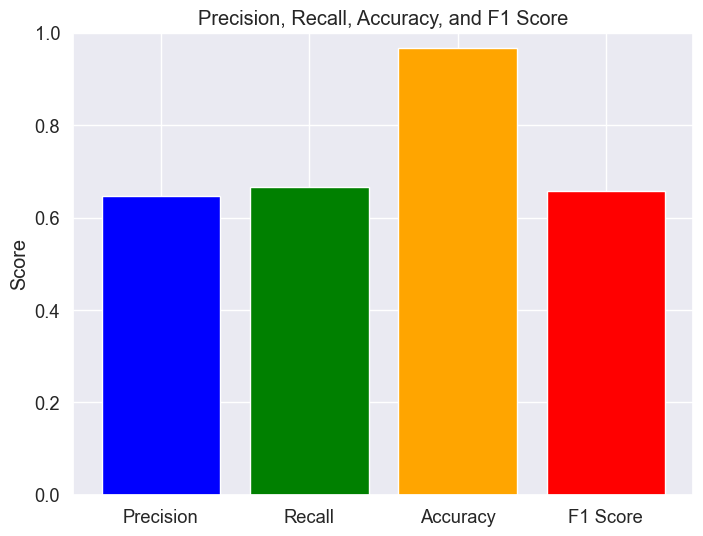

Accuracy: 0.9661016949152542
Recall: 0.6666666666666666
Precision: 0.6476190476190476
F1 Score: 0.6568627450980392


In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Calculate precision, recall, accuracy, and F1 score
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, logpred, average='macro')  # Calculate F1 score

# Create a bar plot for precision, recall, accuracy, and F1 score
metrics = ['Precision', 'Recall', 'Accuracy', 'F1 Score']
values = [precision, recall, accuracy, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)  # Set the y-axis limit to the range [0, 1]
plt.title('Precision, Recall, Accuracy, and F1 Score')
plt.ylabel('Score')
plt.show()

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


In [6]:
# CLUSTERING
# CLUSTERING ON A SUBSET OF DATA CONTINUOS VARIABLES.
selected_columns = ['ACTIVE INGREDIENT OF DRUG 1 ', 'ACTIVE INGREDIENT OF DRUG 2', 'DOSE 1', 'DOSE2']
X = df[selected_columns].values
X

array([['NIMESULIDE ', 'PARACETAMOL', 100, 325.0],
       ['IBUPROFEN', 'PARACETAMOL', 100, 162.5],
       ['IBUPROFEN', 'PARACETAMOL', 400, 325.0],
       ...,
       ['MEFENAMIC ACID', 'NONE', 100, 0.0],
       ['PARACETAMOL', 'NONE', 500, 0.0],
       ['PARACETAMOL', 'NONE', 650, 0.0]], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'dataset' is your original DataFrame
selected_columns = ['ACTIVE INGREDIENT OF DRUG 1 ', 'ACTIVE INGREDIENT OF DRUG 2', 'DOSE 1', 'DOSE2']
X = df[selected_columns].values

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Apply label encoding to 'ACTIVE INGREDIENT OF DRUG 1' and 'ACTIVE INGREDIENT OF DRUG 2' columns
X[:, 0] = encoder.fit_transform(X[:, 0])  # Apply to the first column
X[:, 1] = encoder.fit_transform(X[:, 1])  # Apply to the second column



In [8]:
print(X)
print(X)

[[13 2 100 325.0]
 [7 2 100 162.5]
 [7 2 400 325.0]
 ...
 [11 1 100 0.0]
 [15 1 500 0.0]
 [15 1 650 0.0]]
[[13 2 100 325.0]
 [7 2 100 162.5]
 [7 2 400 325.0]
 ...
 [11 1 100 0.0]
 [15 1 500 0.0]
 [15 1 650 0.0]]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

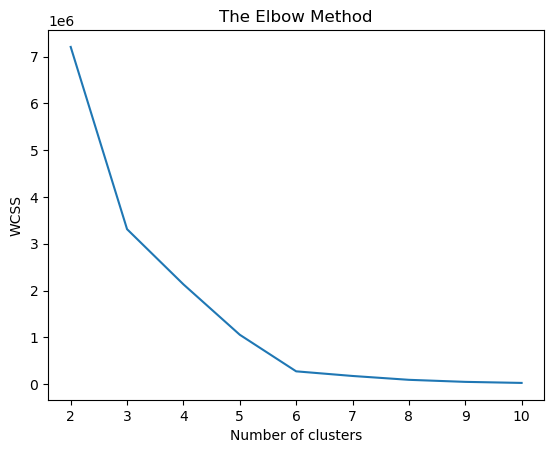

In [12]:
from sklearn.cluster import KMeans
selected_columns = ['ACTIVE INGREDIENT OF DRUG 1 ', 'ACTIVE INGREDIENT OF DRUG 2', 'DOSE 1', 'DOSE2']
X = df[selected_columns].values

# Initialize a list to store the Within-Cluster-Sum-of-Squares (WCSS) values
wcss = []

# Define the range of clusters to consider (adjust as needed)
start_cluster = 2  # Start with 1 cluster
end_cluster = 10  # End with 10 clusters

for i in range(start_cluster, end_cluster + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(start_cluster, end_cluster + 1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


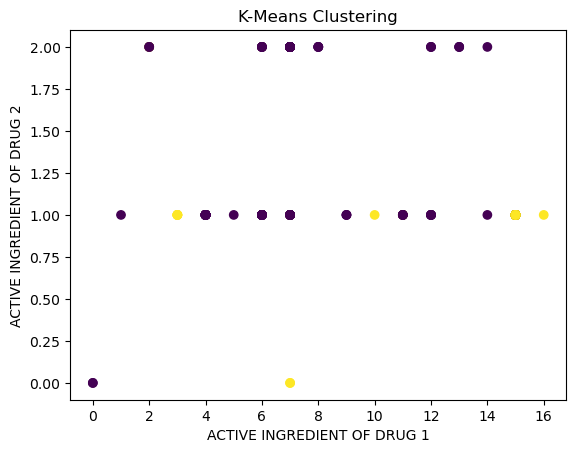

In [13]:
# Assuming 'dataset' is your original DataFrame
selected_columns = ['ACTIVE INGREDIENT OF DRUG 1 ', 'ACTIVE INGREDIENT OF DRUG 2', 'DOSE 1', 'DOSE2']
X = df[selected_columns].values

# Choose the number of clusters (K)
k = 2  # You can adjust this value based on your problem

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model to your data
kmeans.fit(X)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to your DataFrame if needed
df['Cluster'] = cluster_labels

# Visualize the clusters (assuming 2D data)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('ACTIVE INGREDIENT OF DRUG 1')
plt.ylabel('ACTIVE INGREDIENT OF DRUG 2')
plt.title('K-Means Clustering')
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

# Assuming selected_columns is your 1D array
selected_columns = np.array(['DOSE 1', 'DOSE2', 'ACTIVE INGREDIENT OF DRUG 1', 'ACTIVE INGREDIENT OF DRUG 2'])

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the categorical data
encoded_selected_columns = label_encoder.fit_transform(selected_columns)

# Print the encoded values
print("Encoded data:", encoded_selected_columns)


Encoded data: [2 3 0 1]


In [15]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(df)
np.unique(labels)

array([-1], dtype=int64)

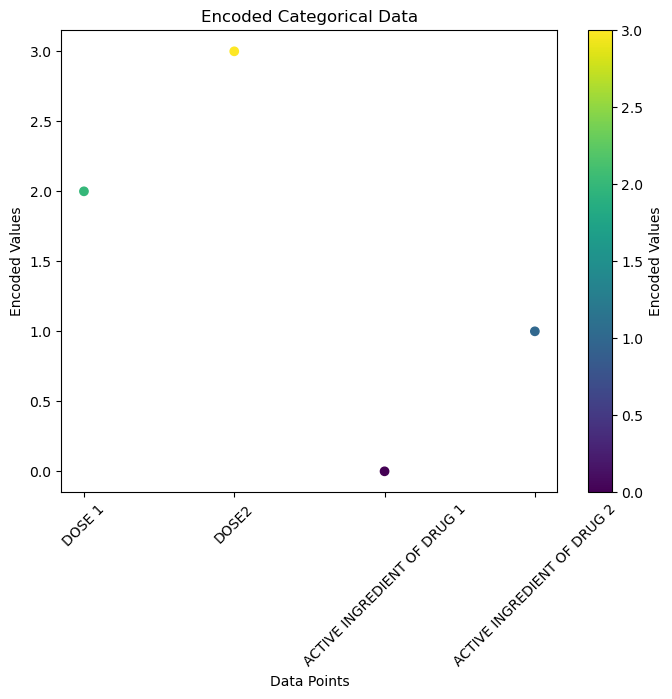

In [16]:
# Assuming selected_columns is your 1D array
selected_columns = np.array(['DOSE 1', 'DOSE2', 'ACTIVE INGREDIENT OF DRUG 1', 'ACTIVE INGREDIENT OF DRUG 2'])

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the categorical data
encoded_selected_columns = label_encoder.fit_transform(selected_columns)

# Create a scatter plot of the encoded values
plt.figure(figsize=(8, 6))
plt.scatter(np.arange(len(selected_columns)), encoded_selected_columns, c=encoded_selected_columns, cmap='viridis')
plt.xlabel("Data Points")
plt.ylabel("Encoded Values")
plt.title("Encoded Categorical Data")
plt.xticks(np.arange(len(selected_columns)), selected_columns, rotation=45)
plt.colorbar(label='Encoded Values')
plt.show()


In [17]:
#Normalising and PCA
df.head()

,SR.NO,NAME( INITIALS),GENDER,AGE(years),OCCUPATION,ACTIVE INGREDIENT OF DRUG 1,ACTIVE INGREDIENT OF DRUG 2,DOSAGE FORM,DOSE 1,DOSE2,INDICATON PATTERN,SELF MEDICATION OR NOT?,ADDITIONAL MEDICINES,INFORMATION ON NSAID,AWARENESS ON NSAID USE,PHARMACIST ROLE,SOURCE OF INFORMATION,SIDE EFFECTS,Follow-up,Cluster
0,1,157,0,3,2,13,2,6,100,325.0,3,1,0,1,2,1,0,5,1,0
1,4,94,0,0,5,7,2,5,100,162.5,0,1,0,1,0,1,2,5,0,0
2,7,143,0,2,2,7,2,6,400,325.0,0,1,0,1,4,1,2,5,1,0
3,8,12,0,3,3,13,2,6,100,325.0,3,1,0,0,2,1,4,5,0,0
4,9,71,0,2,5,11,1,6,500,0.0,3,1,0,1,2,1,5,5,1,1


In [18]:
selected_data = df[['ACTIVE INGREDIENT OF DRUG 1 ', 'ACTIVE INGREDIENT OF DRUG 2', 'DOSE 1', 'DOSE2']].values

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(scaled_data))

In [22]:
transformed

,0,1
0,2.553470,-1.022744
1,2.429797,0.196366
2,2.536398,-1.303929
3,2.553470,-1.022744
4,-0.796223,0.037184
...,...,...
289,-1.195942,-0.401199
290,-0.036792,1.023178
291,0.025977,1.288864
292,-1.195942,-0.401199


In [23]:
pca_clusters = KMeans(4, random_state=0)
pca_clusters.fit(transformed)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [24]:
transformed['Cluster'] = pca_clusters.labels_

In [25]:
transformed

,0,1,Cluster
0,2.553470,-1.022744,2
1,2.429797,0.196366,3
2,2.536398,-1.303929,2
3,2.553470,-1.022744,2
4,-0.796223,0.037184,0
...,...,...,...
289,-1.195942,-0.401199,0
290,-0.036792,1.023178,1
291,0.025977,1.288864,1
292,-1.195942,-0.401199,0


In [26]:
transformed['Cluster'].unique()

array([2, 3, 0, 1])

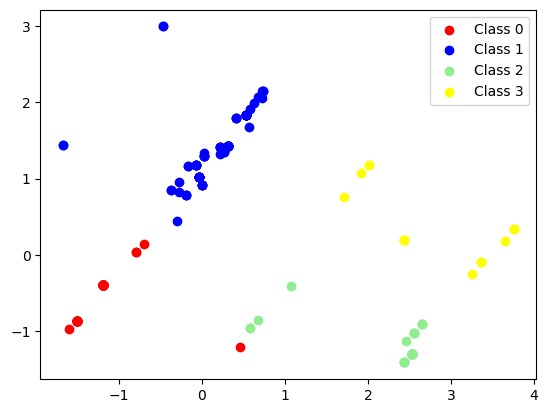

In [27]:
plt.scatter(transformed[transformed['Cluster'] == 0][0], transformed[transformed['Cluster'] == 0][1], label='Class 0', c='red')
plt.scatter(transformed[transformed['Cluster'] == 1][0], transformed[transformed['Cluster'] == 1][1], label='Class 1', c='blue')
plt.scatter(transformed[transformed['Cluster'] == 2][0], transformed[transformed['Cluster'] == 2][1], label='Class 2', c='lightgreen')
plt.scatter(transformed[transformed['Cluster'] == 3][0], transformed[transformed['Cluster'] == 3][1], label='Class 3', c='yellow')

plt.legend()
plt.show()

In [28]:
selected_data 

array([[ 13. ,   2. , 100. , 325. ],
       [  7. ,   2. , 100. , 162.5],
       [  7. ,   2. , 400. , 325. ],
       ...,
       [ 11. ,   1. , 100. ,   0. ],
       [ 15. ,   1. , 500. ,   0. ],
       [ 15. ,   1. , 650. ,   0. ]])

In [29]:
pca_clusters.predict(pca.transform([[13, 2, 550, 350]]))

array([2])